In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [107]:
data = load_wine(as_frame=True).data
target = pd.DataFrame({'target':load_wine().target})

In [108]:
data_with_target = pd.concat([data, target],axis = 'columns' )

<Axes: >

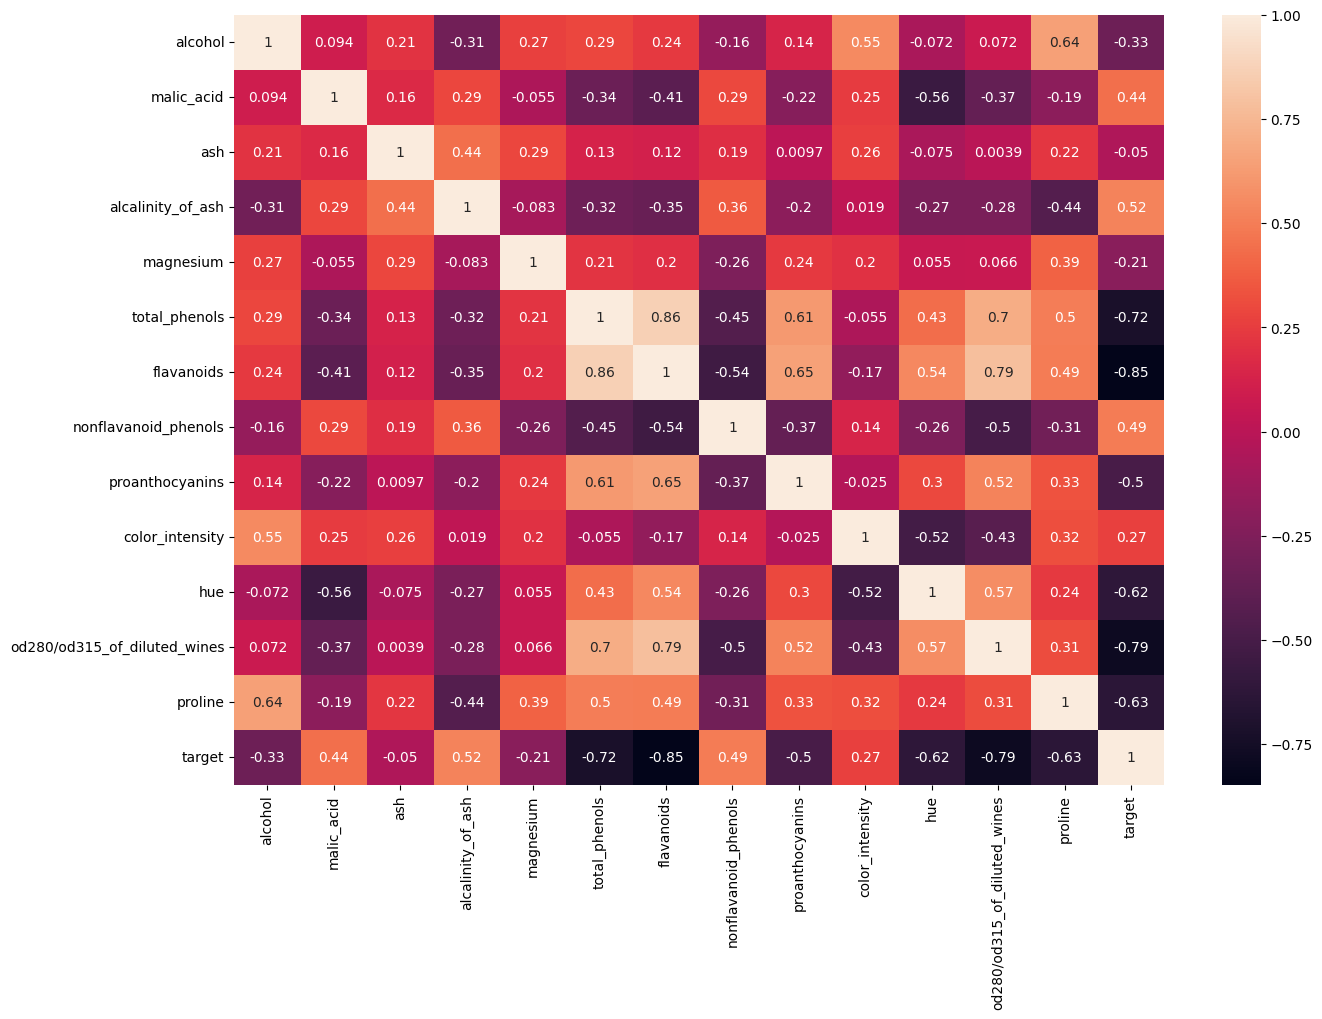

In [109]:
corr = data_with_target.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)
# De esta manera puedo determinar cuales de los features van a ser mas influyentes y eliminar algunos para simplificar el modelo. En particular
# el parametro ash no parece tener demasiada influencia en el tipo de vino. Si quisiera eliminar algunos mas podria incluir: magnesium,
# color_intensity y alcohol

In [110]:
data_filtered = data.drop(['ash'], axis = 'columns')
data_filtered

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(data_filtered, target, test_size=0.2)

In [116]:
model = GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

1.0


c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(158.22222222222223, 0.5, 'Truth')

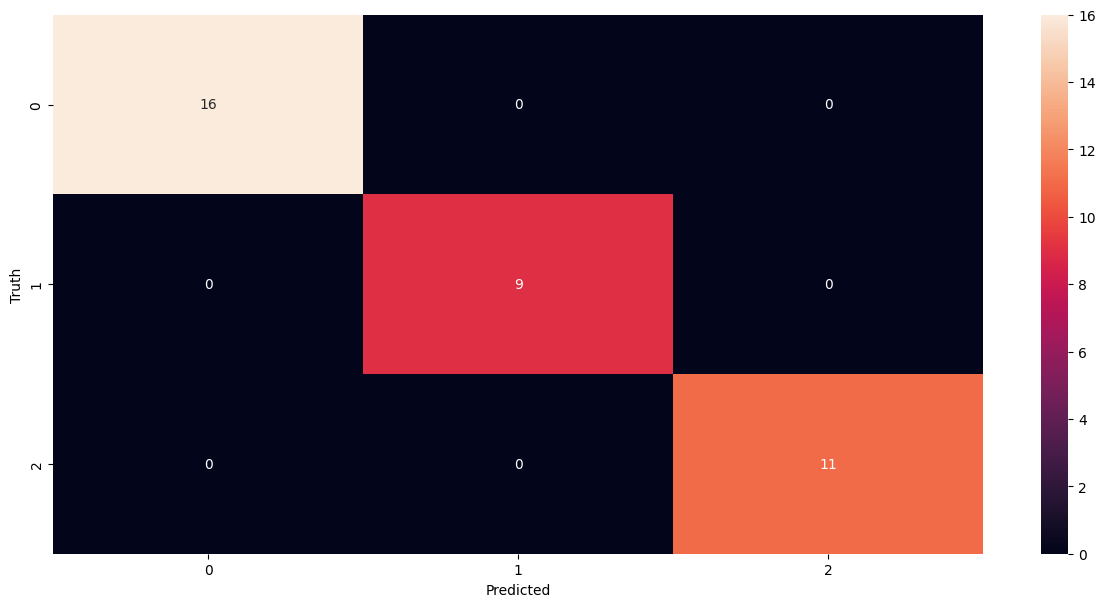

In [113]:
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [114]:
bad_model = MultinomialNB()
bad_model.fit(X_train,y_train)
print(bad_model.score(X_test, y_test))
y_pred = bad_model.predict(X_test)
bad_cm = confusion_matrix(y_test, y_pred)

0.8888888888888888


c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(158.22222222222223, 0.5, 'Truth')

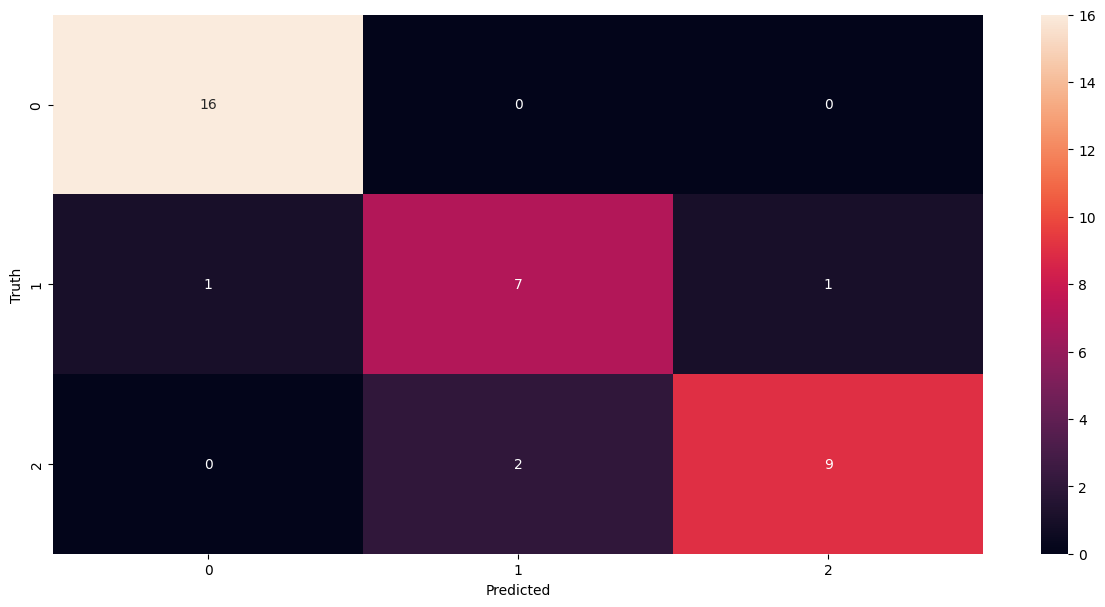

In [115]:
plt.figure(figsize = (15,7))
sns.heatmap(bad_cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')